# **Slice Type Identification**

## **Data Pre-processing**

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, silhouette_samples, silhouette_score, adjusted_rand_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.manifold import TSNE


from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from pandas.plotting import parallel_coordinates

import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/test_dataset.zip')
data.head()

,LTE/5g Category,Time,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone
0,15,17,0.001000,100,0,1,1,0,1,0,0,0,0,0,0,0
1,14,18,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0
2,11,7,0.001000,50,1,0,1,0,0,0,1,0,0,0,0,0
3,20,14,0.001000,50,1,0,1,0,0,0,1,0,0,0,0,0
4,2,22,0.001000,50,0,1,0,1,1,0,0,0,0,0,0,0


In [4]:
# Select relevant features for clustering (excluding LTE/5g Category and Time)
# X = data.drop(['LTE/5g Category', 'Time'], axis=1)
features = ['Packet Loss Rate', 'Packet delay', 'IoT',	'LTE/5G',	'GBR',	'Non-GBR', 'AR/VR/Gaming',	'Healthcare',	'Industry 4.0', 'IoT Devices',	'Public Safety',	'Smart City & Home',	'Smart Transportation',	'Smartphone']
# features = ['Packet Loss Rate', 'Packet delay', 'IoT',	'LTE/5G',	'GBR',	'Non-GBR']
# features = ['Packet Loss Rate', 'IoT',	'LTE/5G',	'GBR',	'Non-GBR']
# features = ['Packet Loss Rate', 'Packet delay']
# features = ['Packet Loss Rate']

temp_X = data[features]
temp_X

,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone
0,0.001000,100,0,1,1,0,1,0,0,0,0,0,0,0
1,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0
2,0.001000,50,1,0,1,0,0,0,1,0,0,0,0,0
3,0.001000,50,1,0,1,0,0,0,1,0,0,0,0,0
4,0.001000,50,0,1,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31579,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0
31580,0.000001,10,1,0,0,1,0,0,1,0,0,0,0,0
31581,0.000001,10,1,0,0,1,0,0,1,0,0,0,0,0
31582,0.010000,75,0,1,0,1,0,0,0,0,0,0,0,1


In [5]:
##########################################################################

# from sklearn.preprocessing import MinMaxScaler

# # Assuming temp_X is your feature matrix
# # Create an instance of MinMaxScaler
# scaler = MinMaxScaler()

# # Fit and transform the data
# X_scaled = scaler.fit_transform(temp_X)

# # Convert the scaled data to a DataFrame
# X = pd.DataFrame(X_scaled, columns=temp_X.columns)

# # Now X contains the scaled features
# X

##########################################################################

X = temp_X

##########################################################################

In [6]:
# Split the dataset into training and testing sets
X_train, X_val = train_test_split(X, test_size=0.1, random_state=42)
X_train

,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone
29413,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0
15104,0.010000,75,0,1,0,1,0,0,0,0,0,0,0,1
13685,0.001000,100,0,1,1,0,0,0,0,0,0,0,0,1
30141,0.010000,300,1,0,1,0,0,0,0,1,0,0,0,0
1395,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,0.001000,50,0,1,0,1,1,0,0,0,0,0,0,0
5390,0.001000,50,1,0,1,0,0,0,1,0,0,0,0,0
860,0.010000,50,1,0,0,1,0,0,0,0,0,1,0,0
15795,0.010000,300,1,0,1,0,0,0,0,0,0,1,0,0


In [7]:
X_val

,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone
27970,0.001000,50,1,0,1,0,0,0,1,0,0,0,0,0
4148,0.000001,10,1,0,0,1,0,0,0,0,1,0,0,0
2527,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0
29113,0.001000,150,0,1,0,1,0,0,0,0,0,0,0,1
2388,0.000001,100,0,1,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346,0.001000,50,1,0,1,0,0,0,1,0,0,0,0,0
1282,0.000001,100,0,1,1,0,0,0,0,0,0,0,0,1
30757,0.000001,300,0,1,0,1,0,0,0,0,0,0,0,1
2310,0.000001,60,0,1,1,0,0,0,0,0,0,0,0,1


# **EDA**

## Pair Plots

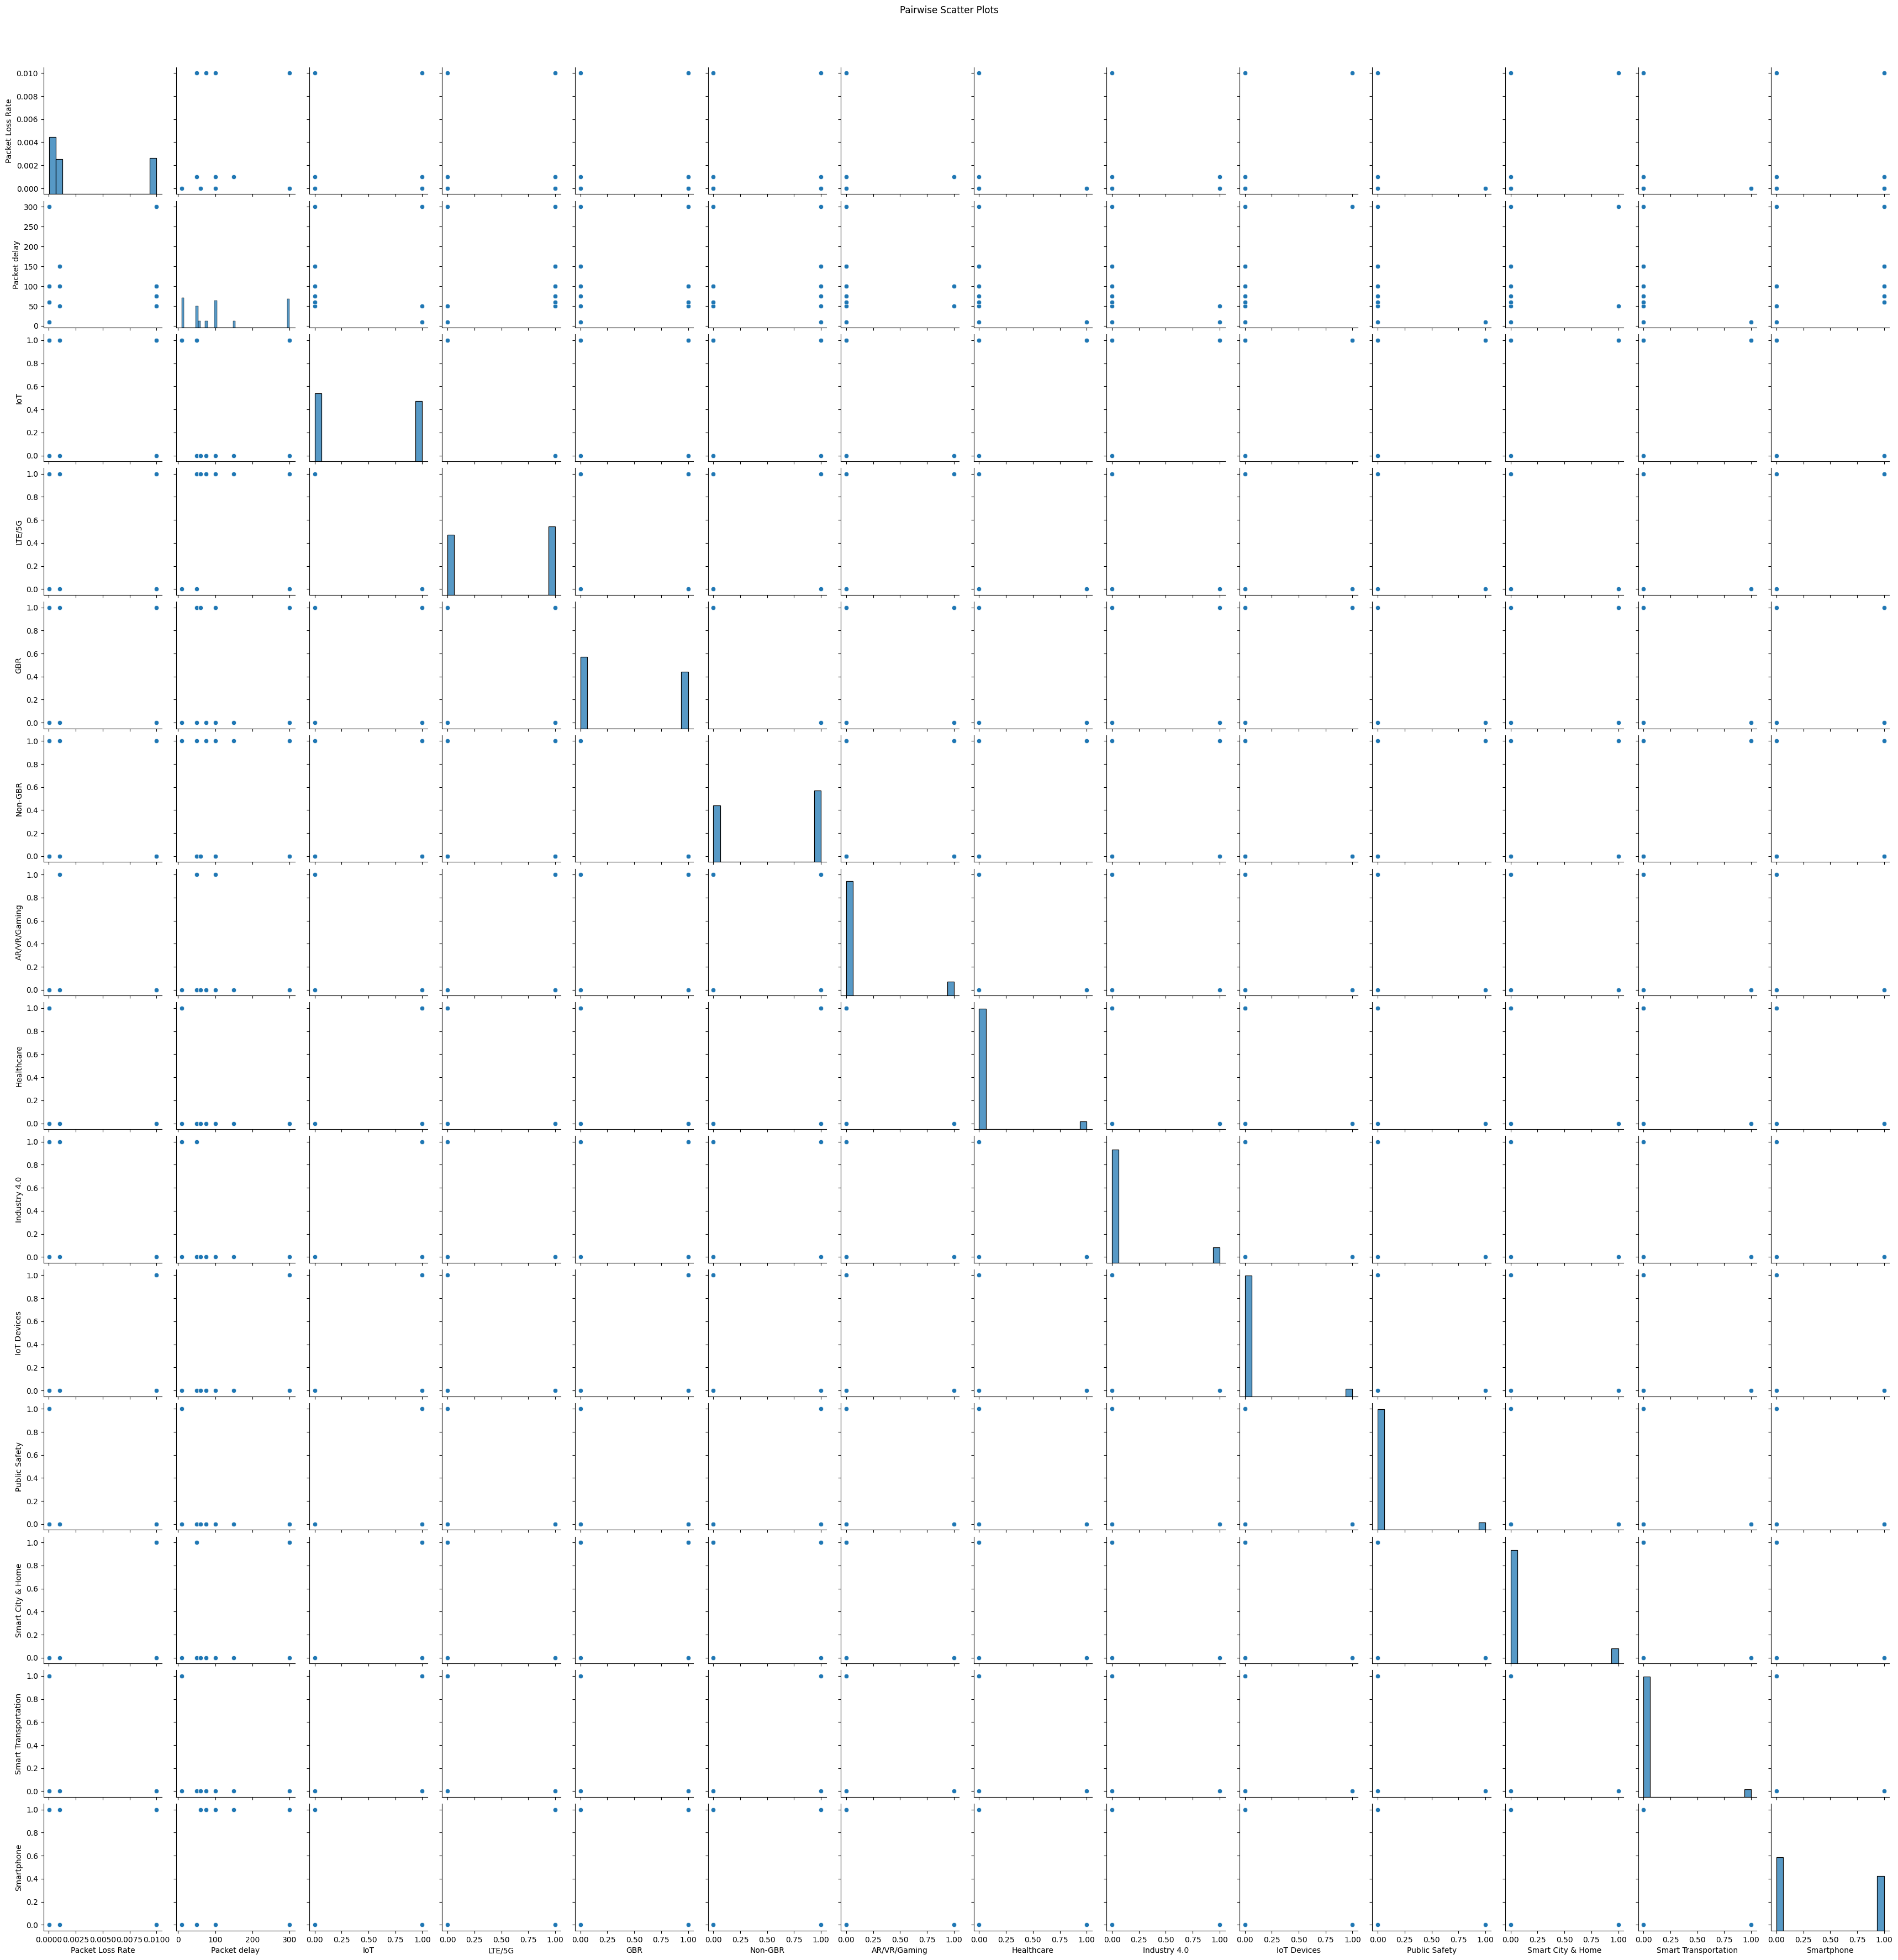

In [8]:
sns.pairplot(X)
plt.suptitle('Pairwise Scatter Plots', y=1.02)
plt.show()

In [9]:
features_group1 = X.columns[:6]
features_group1

Index(['Packet Loss Rate', 'Packet delay', 'IoT', 'LTE/5G', 'GBR', 'Non-GBR'], dtype='object')

## Scatter Plots

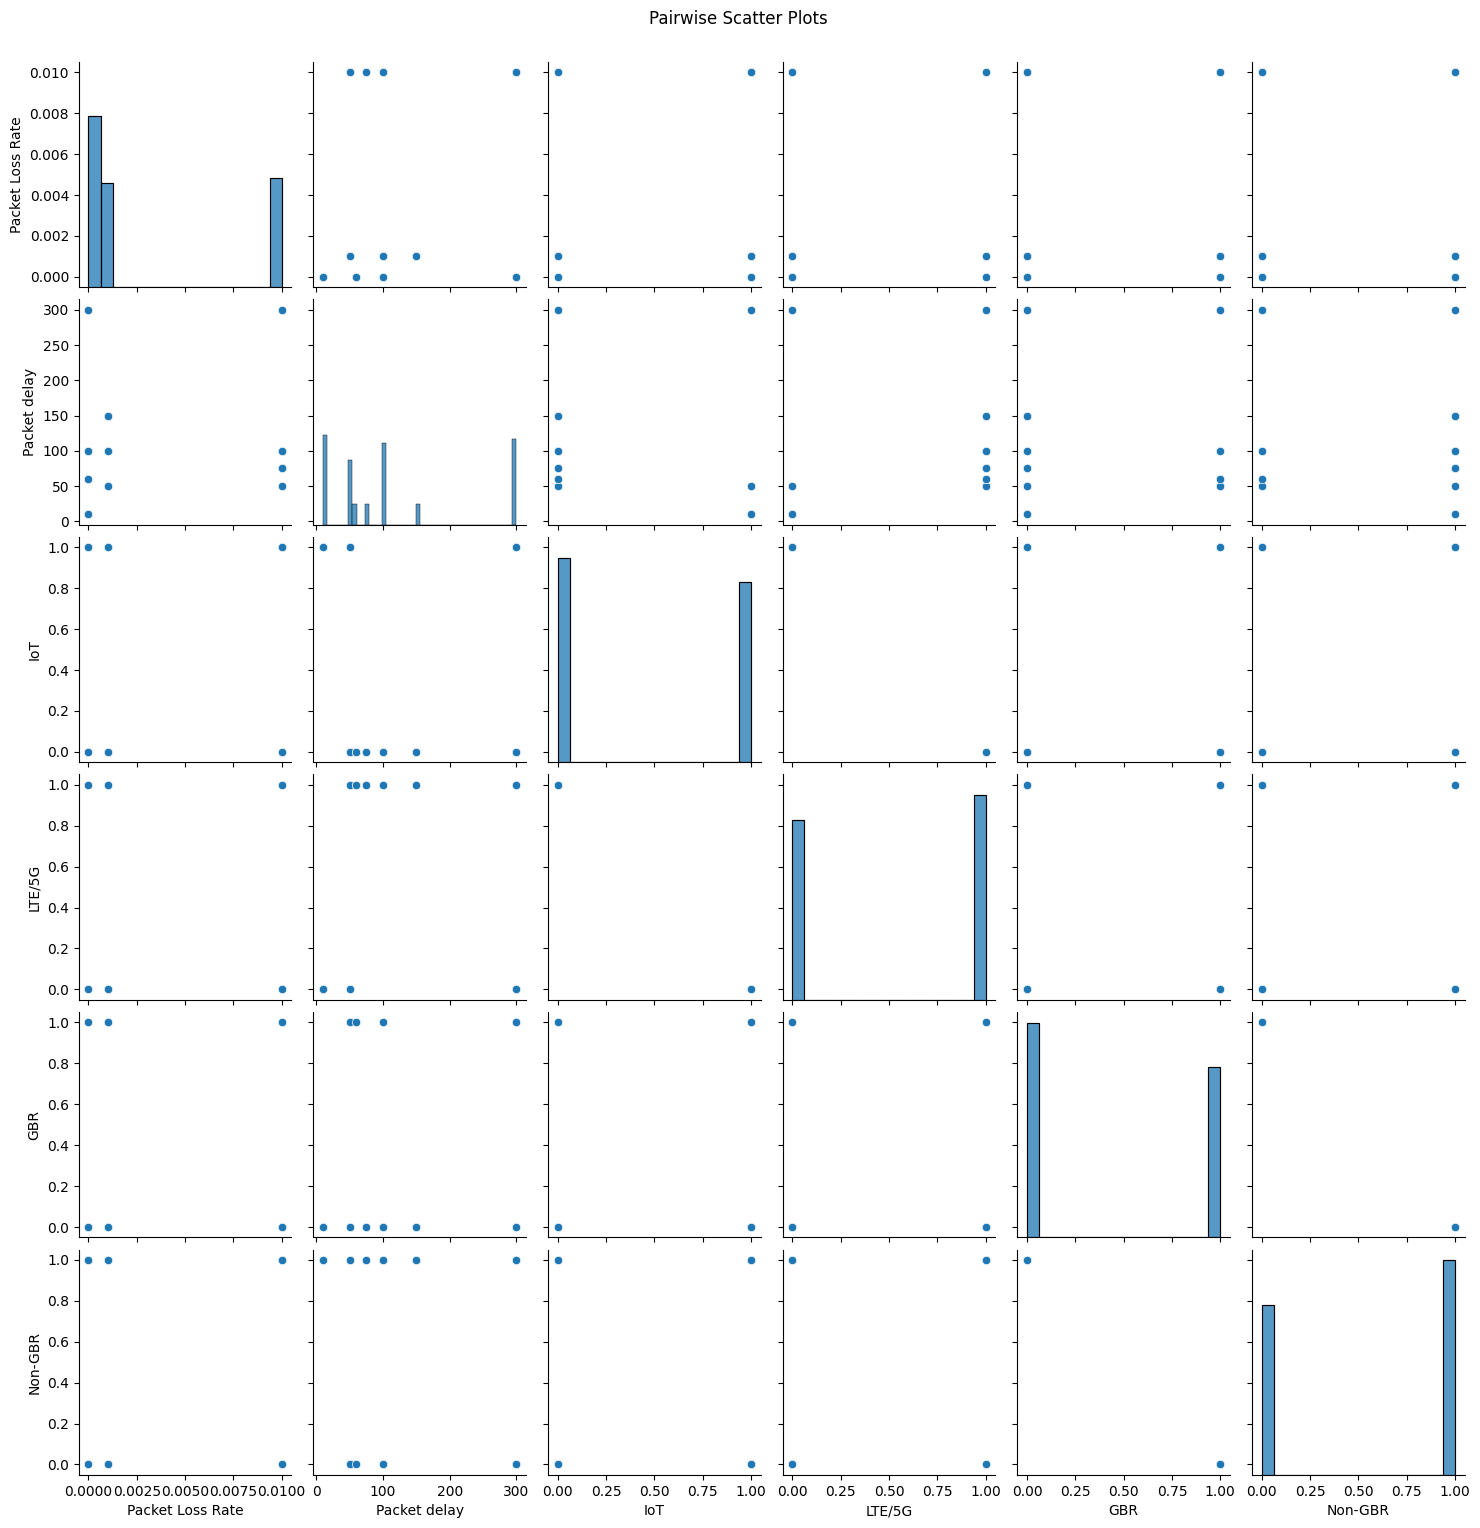

In [10]:
# plt.figure(figsize=(30, 14))
# Create scatter plots for all combinations of features
sns.pairplot(X[features_group1])
plt.suptitle('Pairwise Scatter Plots', y=1.02)
plt.show()

## Feature Distributions

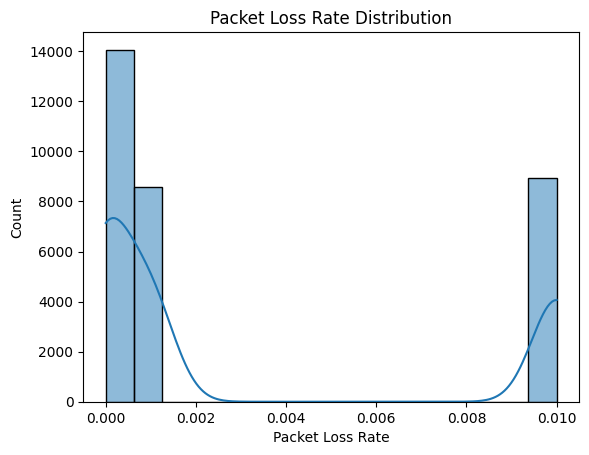

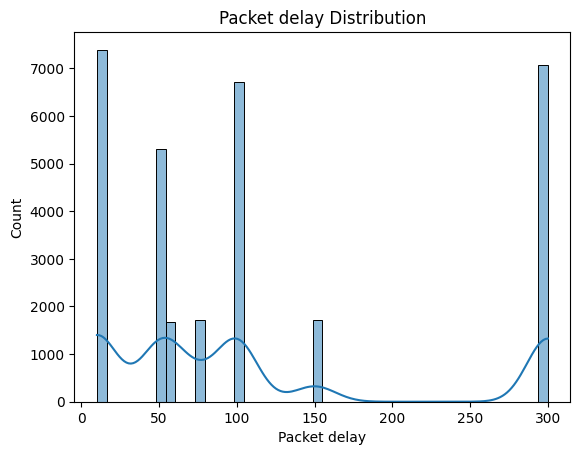

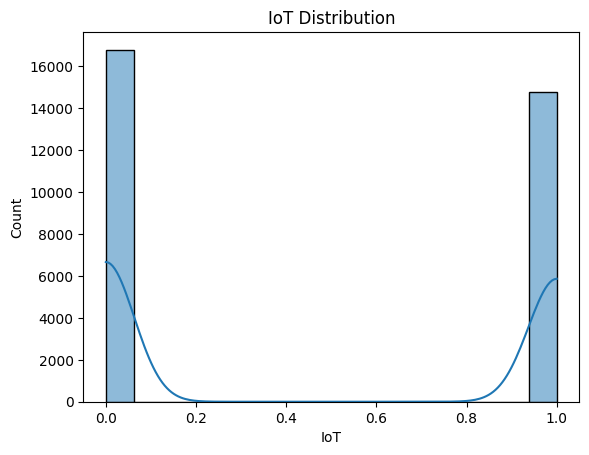

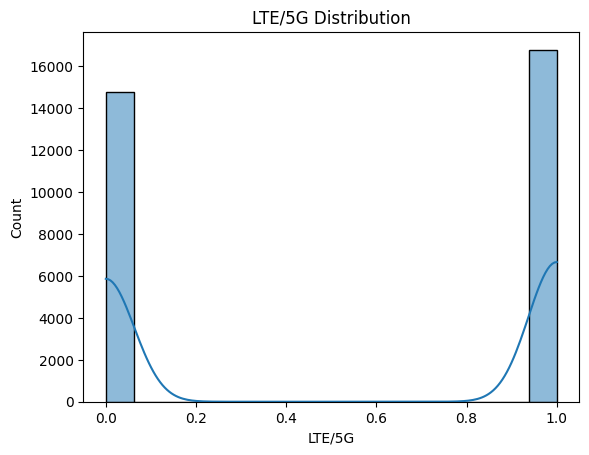

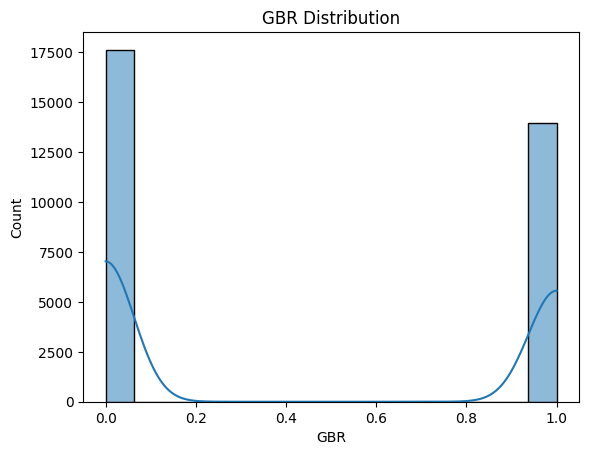

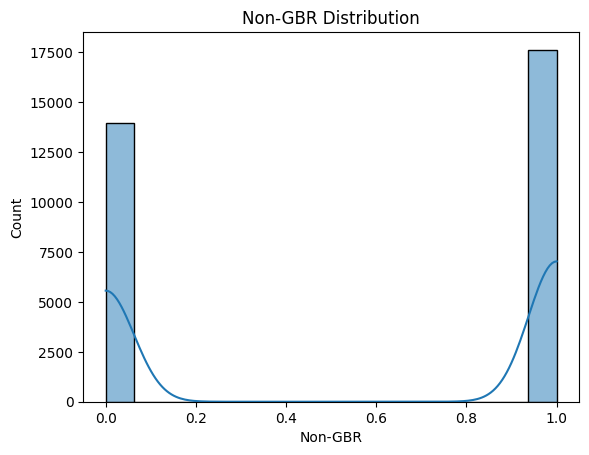

In [11]:
# Create histograms for each feature
for feature in features_group1:
    sns.histplot(X[feature], kde=True)
    plt.title(f'{feature} Distribution')
    plt.show()

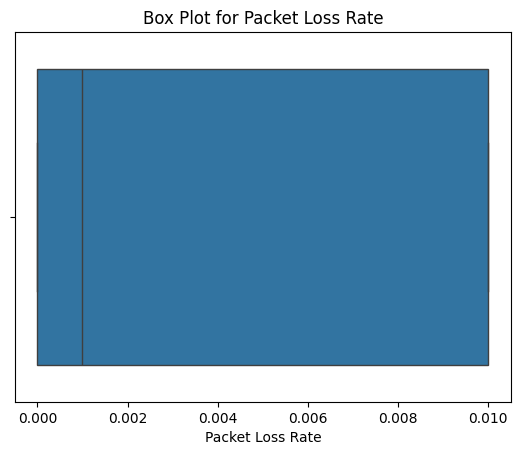

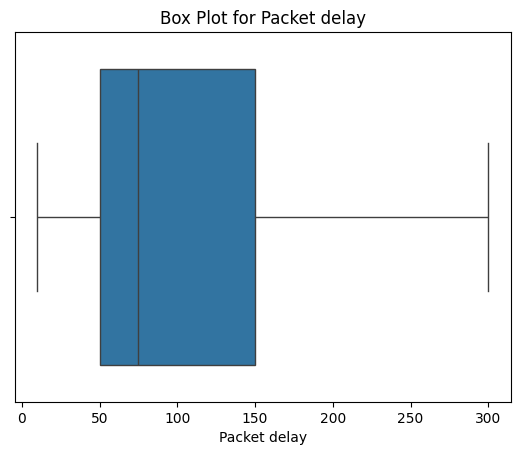

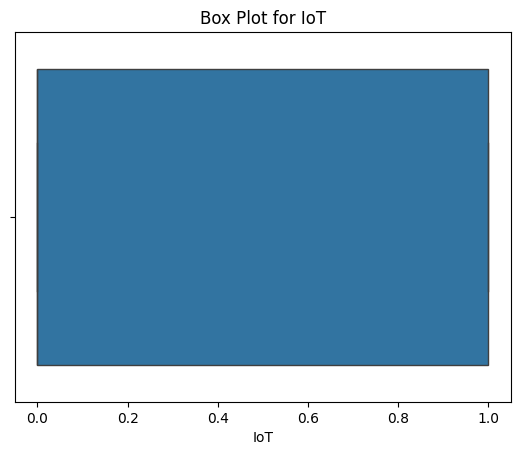

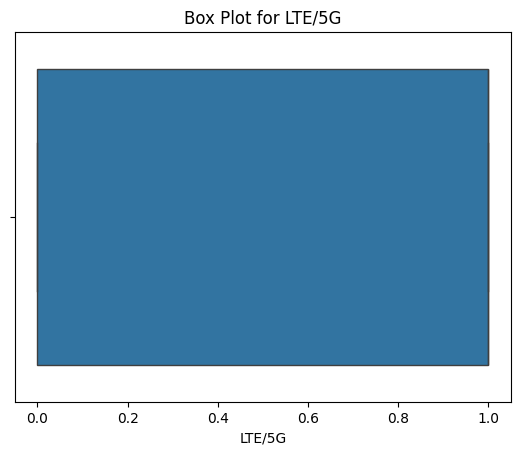

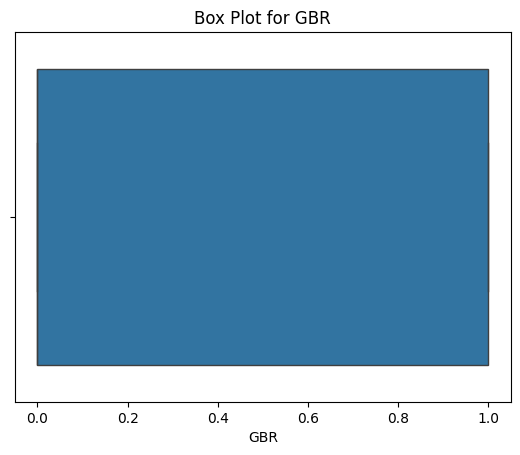

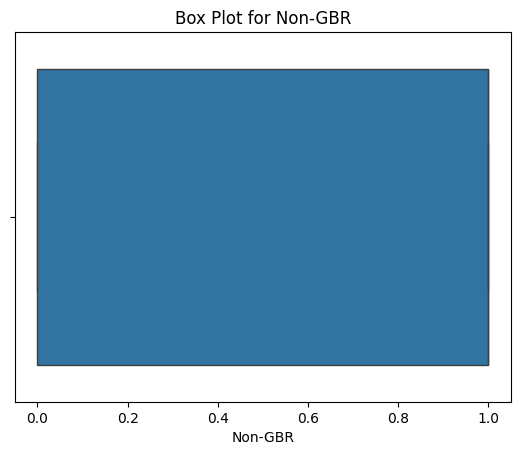

In [12]:
# Create box plots for each feature
for feature in features_group1:
    sns.boxplot(x=feature, data=X)
    plt.title(f'Box Plot for {feature}')
    plt.show()

## Heatmaps

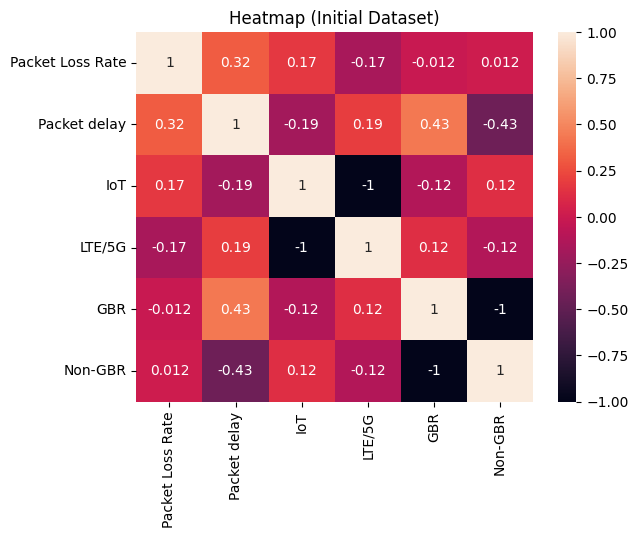

In [13]:
# Create a heatmap for the correlation matrix of all features
sns.heatmap(X[features_group1].corr(), annot=True)
plt.title('Heatmap (Initial Dataset)')
plt.show()

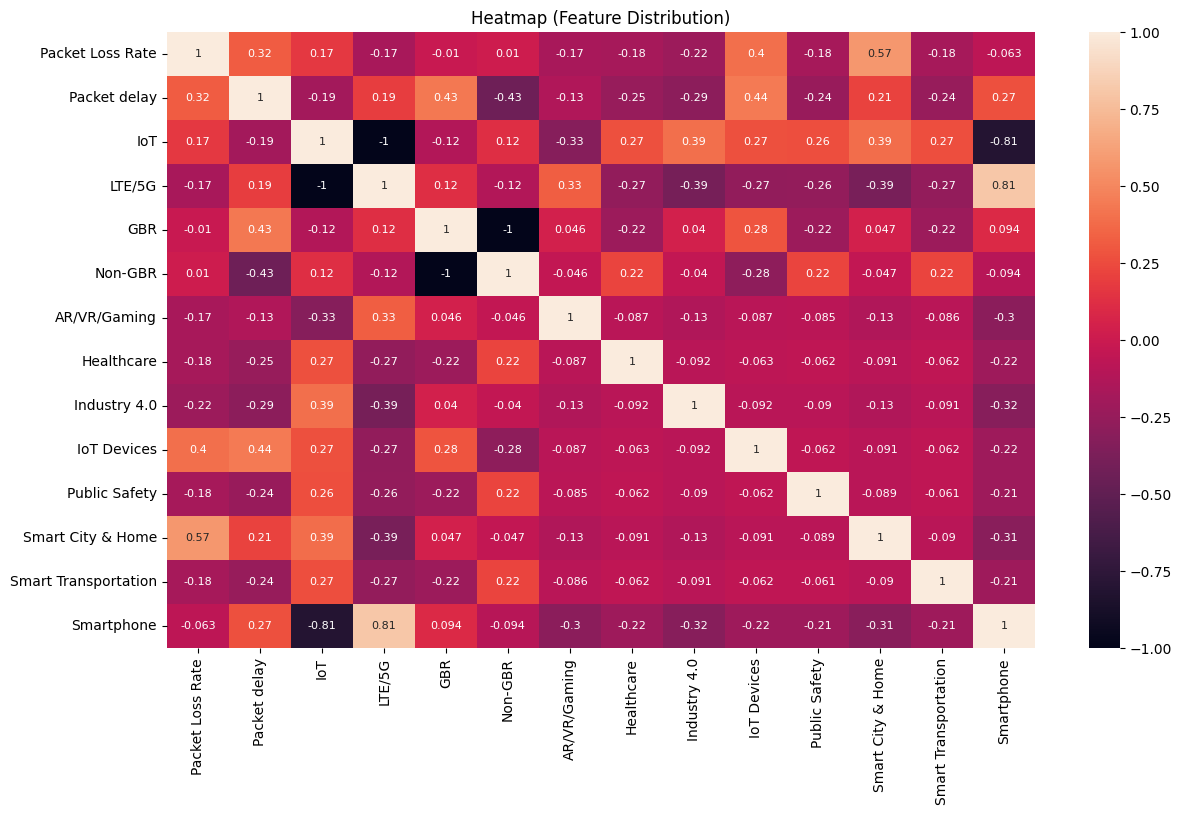

In [14]:
# Create a heatmap for the correlation matrix of all features
plt.figure(figsize=(14, 8))
sns.heatmap(X_train.corr(), annot=True, annot_kws={"size": 8})
plt.title('Heatmap (Feature Distribution)')
plt.show()

## t-SNE (t-Distributed Stochastic Neighbor Embedding)

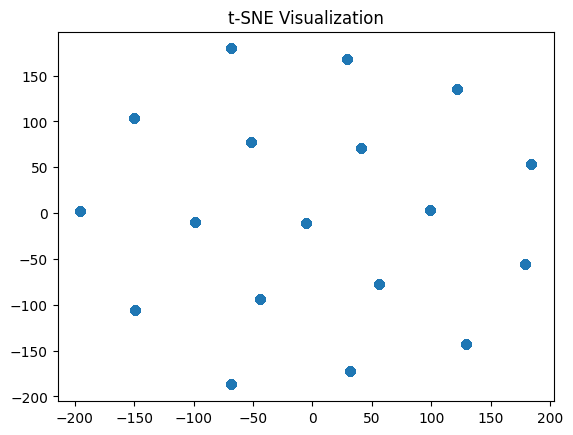

In [15]:
# Assuming 'X' is your feature matrix (shape: [n_samples, n_features])
tsne = TSNE(n_components=2, random_state=42)  # Reduce to 2 dimensions
X_tsne = tsne.fit_transform(X)
X_tsne

# Plot t-SNE visualization
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.title('t-SNE Visualization')
# plt.xlabel('t-SNE Component 1')
# plt.ylabel('t-SNE Component 2')
plt.show()

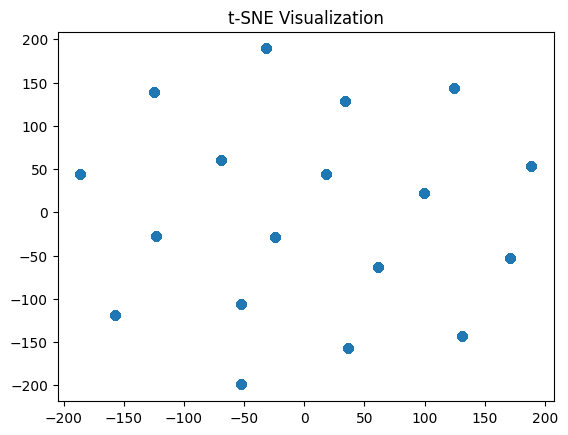

In [16]:
# Assuming 'X' is your feature matrix (shape: [n_samples, n_features])
tsne = TSNE(n_components=2, random_state=42)  # Reduce to 2 dimensions
X_train_tsne = tsne.fit_transform(X_train)
X_train_tsne

# Plot t-SNE visualization
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.title('t-SNE Visualization')
# plt.xlabel('t-SNE Component 1')
# plt.ylabel('t-SNE Component 2')
plt.show()

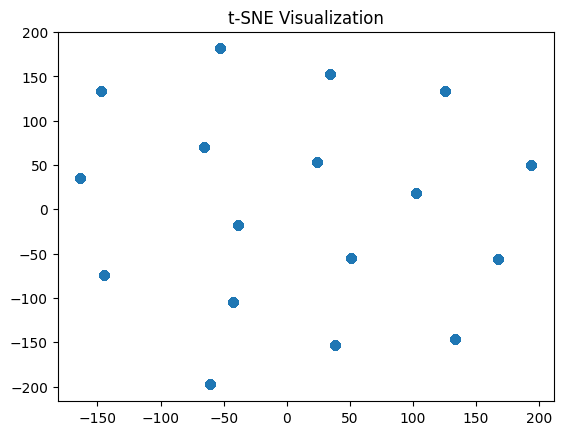

In [17]:
# Assuming 'X' is your feature matrix (shape: [n_samples, n_features])
tsne = TSNE(n_components=2, random_state=42)  # Reduce to 2 dimensions
X_val_tsne = tsne.fit_transform(X_val)
X_val_tsne

# Plot t-SNE visualization
plt.scatter(X_val_tsne[:, 0], X_val_tsne[:, 1])
plt.title('t-SNE Visualization')
# plt.xlabel('t-SNE Component 1')
# plt.ylabel('t-SNE Component 2')
plt.show()

# **Optimum Cluster Analysis**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

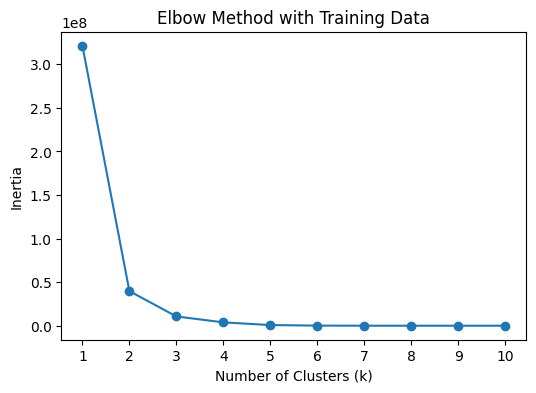

In [18]:
# Elbow Method
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit_predict(X_train)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method with Training Data')
plt.xticks(range(1, 11))
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

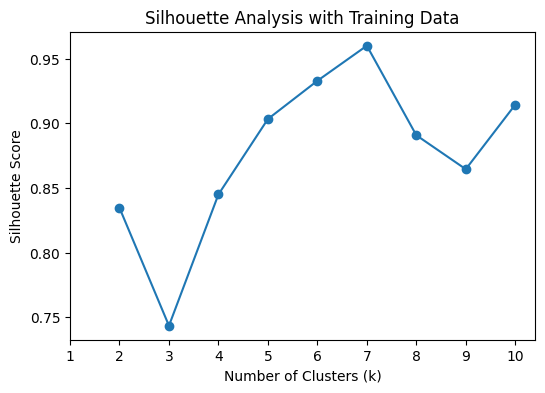

In [19]:
# Silhouette Analysis
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_train)
    silhouette_scores.append(silhouette_score(X_train, labels))

plt.figure(figsize=(6, 4))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis with Training Data')
plt.xticks(range(1, 11))
plt.show()

In [20]:
!pip install gap-stat

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gap-stat: filename=gap_stat-2.0.3-py3-none-any.whl size=6133 sha256=54ee0b23443818f33c8709c2e135645a218ddd818bab77b596db10950dd42860
  Stored in directory: /root/.cache/pip/wheels/e6/75/de/ee29b366258cdeccdacaff94d895b9d2ffc95a486f3b982441
Successfully built gap-stat


Optimal number of clusters: 6.0


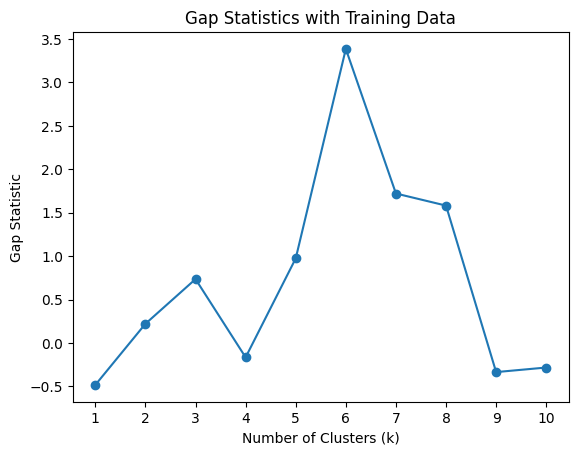

In [21]:
# Gap Statistics
from gap_statistic import OptimalK

# Define the range of cluster values to explore
cluster_range = np.arange(1, 11)
optimal_k = OptimalK(parallel_backend='joblib')
optimal_k(X_train, cluster_array=cluster_range)

n_clusters = optimal_k.gap_df.n_clusters.values[np.argmax(optimal_k.gap_df.gap_value.values)]
print("Optimal number of clusters:", n_clusters)

plt.plot(cluster_range, optimal_k.gap_df.gap_value.values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistics with Training Data')
plt.xticks(range(1, 11))
plt.show()

In [22]:
optimal_k.gap_df

,n_clusters,gap_value,ref_dispersion_std,sk,gap*,sk*,diff,diff*
0,1.0,-0.483190,949233.373790,0.005523,-1.230854e+08,1.421310e+08,-0.698114,-1.215654e+08
1,2.0,0.220486,238284.785036,0.005563,9.803692e+06,1.132367e+07,-0.510846,1.159363e+07
2,3.0,0.735103,72491.175324,0.003770,1.156866e+07,1.335860e+07,0.906617,1.645810e+07
3,4.0,-0.165633,64060.401048,0.005882,-2.268712e+06,2.620727e+06,-1.072067,-1.415313e+06
4,5.0,0.973298,505622.481207,0.066863,5.338121e+06,6.191520e+06,-2.382197,6.220427e+06
5,6.0,3.385000,151462.633157,0.029505,5.688267e+06,6.570573e+06,1.711895,6.244236e+06
6,7.0,1.720355,177816.590849,0.047250,3.560721e+06,4.116690e+06,0.223660,4.041615e+06
7,8.0,1.581314,282255.841657,0.084619,3.009982e+06,3.490876e+06,1.990250,5.383946e+06
8,9.0,-0.335529,171921.547591,0.073406,-1.094569e+06,1.279395e+06,0.067080,6.613583e+05
9,10.0,-0.282845,247714.551272,0.119765,-7.947192e+05,9.612083e+05,NaN,NaN


# **Cluster Analysis Comparison**

In [23]:
# # Data
# features = ['All', 'Packet Loss Rate, Packet delay, IoT, LTE/5G, GBR, and Non-GBR',
#             'Packet Loss Rate, IoT, LTE/5G, GBR, and Non-GBR', 'Packet Loss Rate, Packet delay', 'Packet Loss Rate']
# num_clusters = [3, 3, 3, 3, 3]
# silhouette_scores_train = [0.743, 0.746, 0.786, 0.75, 1]
# silhouette_scores_val = [0.749, 0.752, 0.785, 0.756, 1]
# silhouette_scores_test = [0.745, 0.748, 0.787, 0.751, 1]
# ari_test = [0.271, 0.271, 0.394, 0.271, 0.224]

# # Plotting Silhouette Scores
# fig, ax = plt.subplots(2, 1, figsize=(20, 8))

# # Silhouette Scores for Training, Validation, and Testing Data
# ax[0].bar(features, silhouette_scores_train, label='Training Data', alpha=0.7)
# ax[0].bar(features, silhouette_scores_val, label='Validation Data', alpha=0.7)
# ax[0].bar(features, silhouette_scores_test, label='Labelled Testing Data', alpha=0.7)

# ax[0].set_ylabel('Silhouette Score')
# ax[0].set_title('Silhouette Scores for Different Scenarios')
# ax[0].legend()

# # ARI for Labelled Testing Data
# ax[1].bar(features, ari_test, color='orange', alpha=0.7)
# ax[1].set_ylabel('ARI (Adjusted Rand Index)')
# ax[1].set_title('ARI for Labelled Testing Data')

# plt.tight_layout()
# plt.show()


# **Data Modelling and Analysis**

In [24]:
# Create a KMeans model
kmeans_model = KMeans(n_clusters=3, random_state=42)

# Fit the model to the training data
kmeans_model.fit(X_train)

# Predict the labels for the test data
y_pred = kmeans_model.predict(X_val)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [25]:
y_pred

array([0, 0, 0, ..., 1, 0, 2], dtype=int32)

In [26]:
labels = kmeans_model.labels_
centroids = kmeans_model.cluster_centers_

In [27]:
labels

array([0, 2, 2, ..., 0, 1, 2], dtype=int32)

In [28]:
centroids

array([[ 1.49951214e-03,  3.05790732e+01,  7.68833372e-01,
         2.31166628e-01,  2.44660344e-01,  7.55339656e-01,
         1.15429100e-01,  1.29770992e-01,  2.60158840e-01,
         6.35602682e-15,  1.25530110e-01,  1.25453003e-01,
         1.27920426e-01,  1.15737528e-01],
       [ 5.27715529e-03,  3.00000000e+02,  5.27668296e-01,
         4.72331704e-01,  7.66356614e-01,  2.33643386e-01,
         6.60582700e-15,  1.72084569e-15, -6.30051566e-15,
         2.65331862e-01, -2.08166817e-16,  2.62336434e-01,
        -3.24740235e-15,  4.72331704e-01],
       [ 3.84752178e-03,  1.04282344e+02,  1.22124533e-14,
         1.00000000e+00,  4.95226599e-01,  5.04773401e-01,
         1.69538023e-01,  4.46864767e-15, -7.66053887e-15,
         4.46864767e-15, -2.50494070e-15,  1.35585987e-14,
        -3.95516953e-15,  8.30461977e-01]])

In [29]:
np.unique(labels)

array([0, 1, 2], dtype=int32)

In [30]:
# Get the column names from the original DataFrame
X_train_column_names = X_train.columns.tolist()

# Convert X_test to a pandas DataFrame
X_train_df = pd.DataFrame(X_train, columns=X_train_column_names)  # Replace X_test_column_names with your actual column names
X_train_with_predictions = X_train_df.copy()  # Create a copy to avoid modifying the original DataFrame

# Include the 'labels' as a new column in the DataFrame for coloring
X_train_with_predictions['cluster_label'] = labels
X_train_with_predictions

,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,cluster_label
29413,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0,0
15104,0.010000,75,0,1,0,1,0,0,0,0,0,0,0,1,2
13685,0.001000,100,0,1,1,0,0,0,0,0,0,0,0,1,2
30141,0.010000,300,1,0,1,0,0,0,0,1,0,0,0,0,1
1395,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,0.001000,50,0,1,0,1,1,0,0,0,0,0,0,0,0
5390,0.001000,50,1,0,1,0,0,0,1,0,0,0,0,0,0
860,0.010000,50,1,0,0,1,0,0,0,0,0,1,0,0,0
15795,0.010000,300,1,0,1,0,0,0,0,0,0,1,0,0,1


In [31]:
# Get the column names from the original DataFrame
X_val_column_names = X_val.columns.tolist()

# Convert X_test to a pandas DataFrame
X_val_df = pd.DataFrame(X_val, columns=X_val_column_names)  # Replace X_test_column_names with your actual column names
X_val_with_predictions = X_val_df.copy()  # Create a copy to avoid modifying the original DataFrame

# Resetting indices to avoid alignment issues
X_val_with_predictions.reset_index(drop=True, inplace=True)
# y_pred.reset_index(drop=True, inplace=True)
y_pred = pd.Series(y_pred, name='predicted_cluster_label')

# Include the 'labels' as a new column in the DataFrame for coloring
X_val_with_predictions['predicted_cluster_label'] = y_pred
X_val_with_predictions

,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,predicted_cluster_label
0,0.001000,50,1,0,1,0,0,0,1,0,0,0,0,0,0
1,0.000001,10,1,0,0,1,0,0,0,0,1,0,0,0,0
2,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0,0
3,0.001000,150,0,1,0,1,0,0,0,0,0,0,0,1,2
4,0.000001,100,0,1,1,0,0,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3154,0.001000,50,1,0,1,0,0,0,1,0,0,0,0,0,0
3155,0.000001,100,0,1,1,0,0,0,0,0,0,0,0,1,2
3156,0.000001,300,0,1,0,1,0,0,0,0,0,0,0,1,1
3157,0.000001,60,0,1,1,0,0,0,0,0,0,0,0,1,0


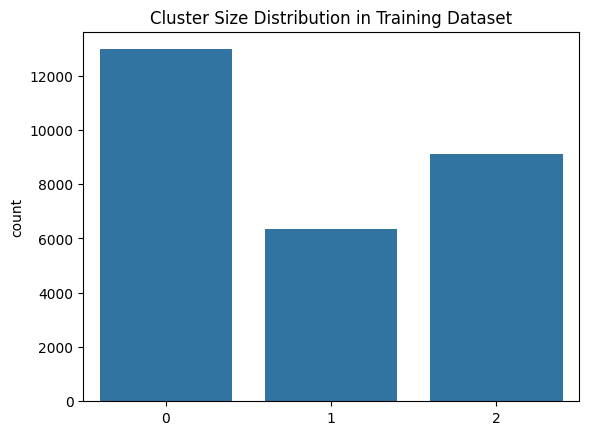

In [32]:
# Cluster Size Distribution

sns.countplot(x=labels, data=X_train)
plt.title('Cluster Size Distribution in Training Dataset')
plt.show()

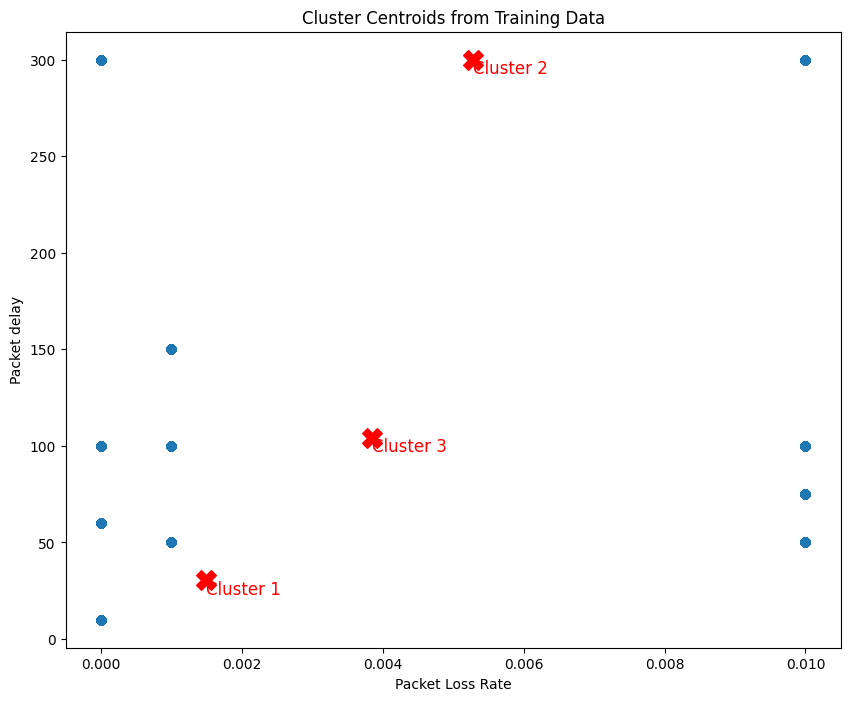

In [33]:
# Cluster Centroids

plt.figure(figsize=(10, 8))
plt.scatter(X_train[features[0]], X_train[features[1]])
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red', label='Centroids')

for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Cluster {i+1}', color='red', fontsize=12, ha='left', va='top')
plt.title('Cluster Centroids from Training Data')
plt.xlabel(X_train.columns[0])
plt.ylabel(X_train.columns[1])
plt.show()

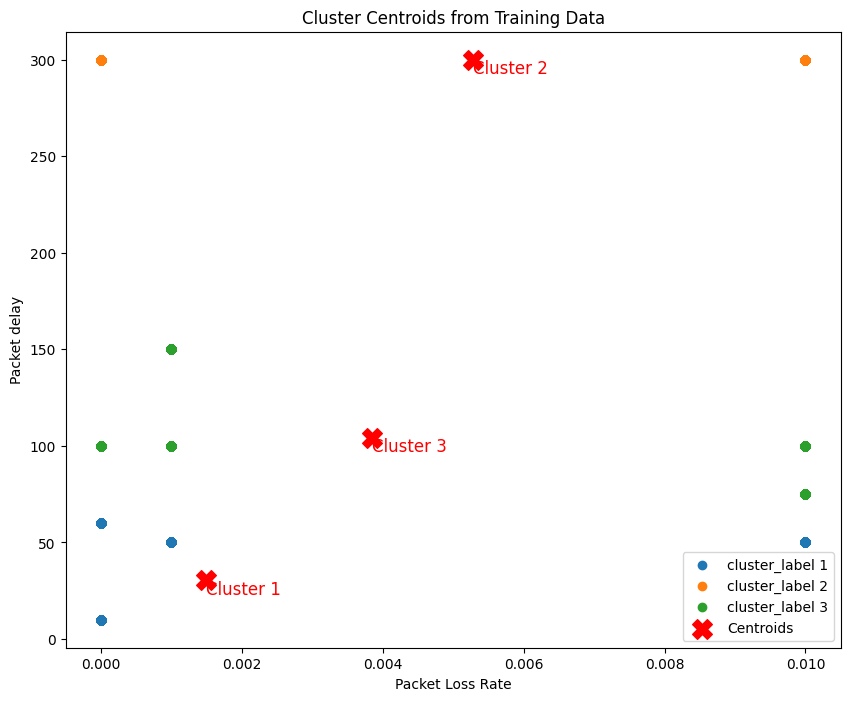

In [34]:
# Plot the scatter plot with different colors for each cluster
plt.figure(figsize=(10, 8))
for cluster in range(3):
    cluster_data_train = X_train_with_predictions[X_train_with_predictions['cluster_label'] == cluster]
    plt.scatter(cluster_data_train[features[0]], cluster_data_train[features[1]], label=f'cluster_label {cluster + 1}')

# Plot centroids (optional)
# centroids_temp = scaler.transform(centroids)
centroids_temp = centroids
plt.scatter(centroids_temp[:, 0], centroids_temp[:, 1], marker='X', s=200, c='red', label='Centroids')

for i, centroid in enumerate(centroids_temp):
    plt.text(centroid[0], centroid[1], f'Cluster {i+1}', color='red', fontsize=12, ha='left', va='top')

plt.title('Cluster Centroids from Training Data')
plt.xlabel(X_train_with_predictions.columns[0])
plt.ylabel(X_train_with_predictions.columns[1])
plt.legend()
plt.show()

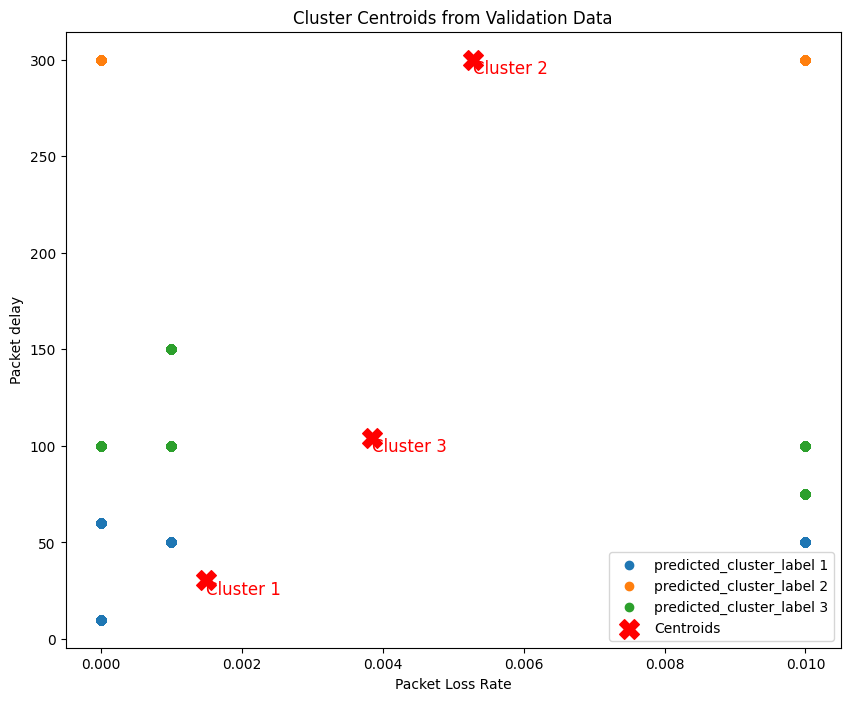

In [35]:
# Plot the scatter plot with different colors for each cluster
plt.figure(figsize=(10, 8))
for cluster in range(3):
    cluster_data_val = X_val_with_predictions[X_val_with_predictions['predicted_cluster_label'] == cluster]
    plt.scatter(cluster_data_val[features[0]], cluster_data_val[features[1]], label=f'predicted_cluster_label {cluster + 1}')

# Plot centroids (optional)
# centroids_temp = scaler.transform(centroids)
centroids_temp = centroids
plt.scatter(centroids_temp[:, 0], centroids_temp[:, 1], marker='X', s=200, c='red', label='Centroids')

for i, centroid in enumerate(centroids_temp):
    plt.text(centroid[0], centroid[1], f'Cluster {i+1}', color='red', fontsize=12, ha='left', va='top')

plt.title('Cluster Centroids from Validation Data')
plt.xlabel(X_val_with_predictions.columns[0])
plt.ylabel(X_val_with_predictions.columns[1])
plt.legend()
plt.show()

In [36]:
# plt.figure(figsize=(10, 8))

# # Scatter plot of data points
# plt.scatter(X_train[features[0]], X_train[features[1]])

# # Scatter plot of cluster centroids
# plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red', label='Centroids')

# # Plot circles around centroids
# for i, centroid in enumerate(centroids):
#     circle = plt.Circle((centroid[0], centroid[1]), radius=10, edgecolor='black', facecolor='none', linestyle='dashed')
#     plt.gca().add_patch(circle)
#     plt.text(centroid[0], centroid[1], f'Cluster {i+1}', color='red', fontsize=12, ha='center', va='center')

# plt.title('Clusters with Circles around Centroids')
# plt.xlim(0, max(X_train[features[0]]) + (max(X_train[features[0]])*0.1))
# plt.legend()
# plt.show()

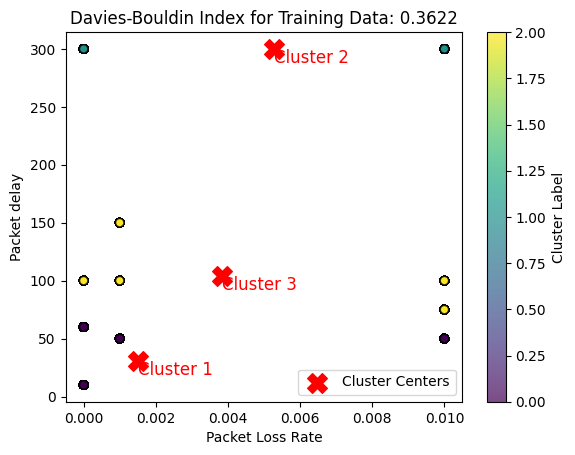

In [37]:
# Davies-Bouldin Index is the ratio of mean inter-cluster variance to mean intra-cluster variance

# Calculate Davies-Bouldin Index
db_index_train = metrics.davies_bouldin_score(X_train, labels)

# Plot the data and cluster centers
# scatter = plt.scatter(X_train[features[0]], X_train[features[1]], c = [plt.cm.viridis(i) for i in labels], cmap='viridis', edgecolors='k', alpha=0.7)
scatter = plt.scatter(X_train[features[0]], X_train[features[1]], c = labels, cmap='viridis', edgecolors='k', alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Cluster Centers')

for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Cluster {i+1}', color='red', fontsize=12, ha='left', va='top')

# Add colorbar for better interpretation of Davies-Bouldin Index values
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster Label')

plt.title(f'Davies-Bouldin Index for Training Data: {db_index_train:.4f}')
plt.xlabel(X_val.columns[0])
plt.ylabel(X_val.columns[1])
plt.legend()
plt.show()

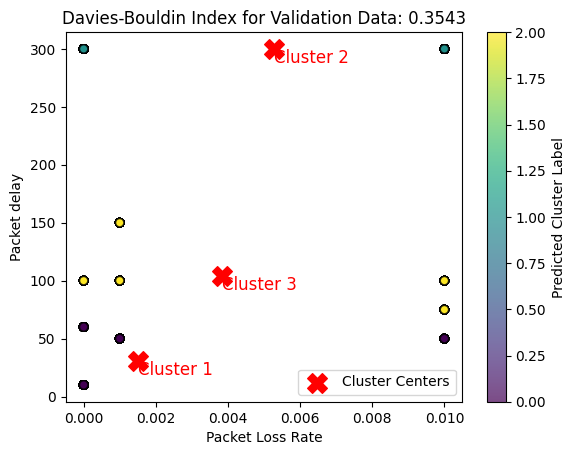

In [38]:
# Calculate Davies-Bouldin Index
db_index_val = metrics.davies_bouldin_score(X_val, y_pred)

# Plot the data and cluster centers
# plt.scatter(X_val[features[0]], X_val[features[1]], c = [plt.cm.viridis(i) for i in y_pred], cmap='viridis', edgecolors='k', alpha=0.7)
scatter = plt.scatter(X_val[features[0]], X_val[features[1]], c = y_pred, cmap='viridis', edgecolors='k', alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Cluster Centers')

for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Cluster {i+1}', color='red', fontsize=12, ha='left', va='top')

# Add colorbar for better interpretation of Davies-Bouldin Index values
cbar = plt.colorbar(scatter)
cbar.set_label('Predicted Cluster Label')

plt.title(f'Davies-Bouldin Index for Validation Data: {db_index_val:.4f}')
plt.xlabel(X_val.columns[0])
plt.ylabel(X_val.columns[1])
plt.legend()
plt.show()

In [39]:
# It Provides a measure of how well-separated clusters are in the data with the score ranging from -1 to 1
silhouette_score_value1 = silhouette_score(X_train, labels)
print("Silhouette Score for Training Data:", silhouette_score_value1)

silhouette_score_value2 = silhouette_score(X_val, y_pred)
print("Silhouette Score for Validation Data:", silhouette_score_value2)

Silhouette Score for Training Data: 0.7435305922673834
Silhouette Score for Validation Data: 0.7490860003636145


<ipython-input-40-6c07dd74b531>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(np.unique(labels)))


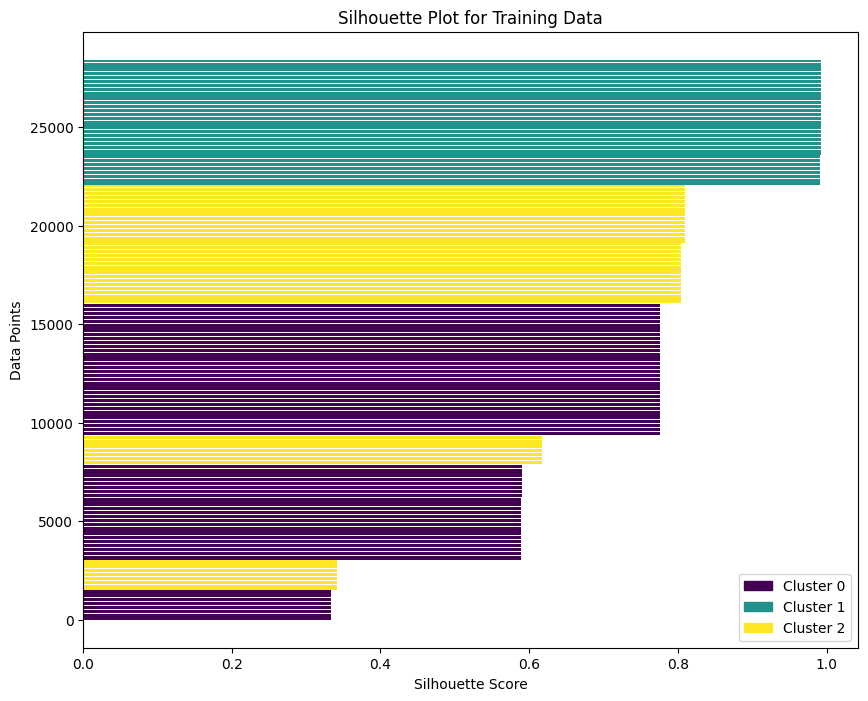

In [40]:
# Silhouette Plots

plt.figure(figsize=(10, 8))

# Create a color map with a unique color for each cluster
colors = plt.cm.get_cmap('viridis', len(np.unique(labels)))

silhouette_train_vals = silhouette_samples(X_train, labels)
sorted_idx = np.argsort(silhouette_train_vals)

# Plot the silhouette bars
bars = plt.barh(range(len(X_train)), silhouette_train_vals[sorted_idx], color=colors(labels[sorted_idx]))

# # Annotate each bar with its cluster label
# for bar, label in zip(bars, labels[sorted_idx]):
#     plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, str(label), va='center', ha='left')

# Create legend based on unique cluster labels
unique_labels = np.unique(labels)
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=colors(label)) for label in unique_labels]
plt.legend(legend_handles, [f'Cluster {label}' for label in unique_labels], loc='lower right')

plt.title('Silhouette Plot for Training Data')
plt.xlabel('Silhouette Score')
plt.ylabel('Data Points')
plt.show()

<ipython-input-41-f7181de7db1c>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(np.unique(y_pred)))


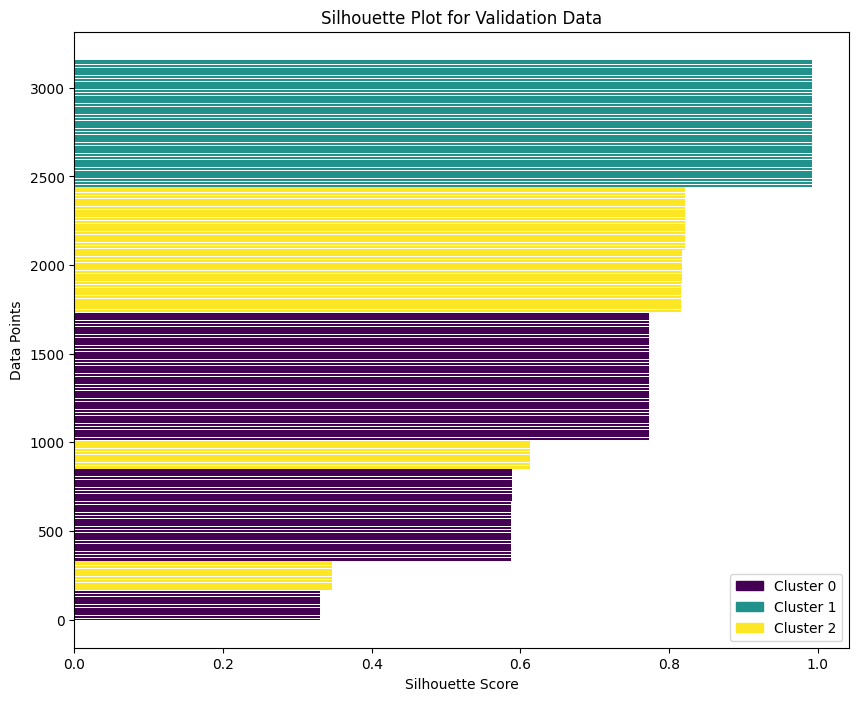

In [41]:
plt.figure(figsize=(10, 8))

# Create a color map with a unique color for each cluster
colors = plt.cm.get_cmap('viridis', len(np.unique(y_pred)))

silhouette_val_vals = silhouette_samples(X_val, y_pred)
sorted_idx = np.argsort(silhouette_val_vals)

# Plot the silhouette bars
bars = plt.barh(range(len(X_val)), silhouette_val_vals[sorted_idx], color=colors(y_pred[sorted_idx]))

# Create legend based on unique cluster labels
unique_labels = np.unique(y_pred)
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=colors(label)) for label in unique_labels]
plt.legend(legend_handles, [f'Cluster {label}' for label in unique_labels], loc='lower right')

plt.title('Silhouette Plot for Validation Data')
plt.xlabel('Silhouette Score')
plt.ylabel('Data Points')
plt.show()

<ipython-input-42-ad3fd1037c0f>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', len(df_centroids['cluster_label'].unique()))


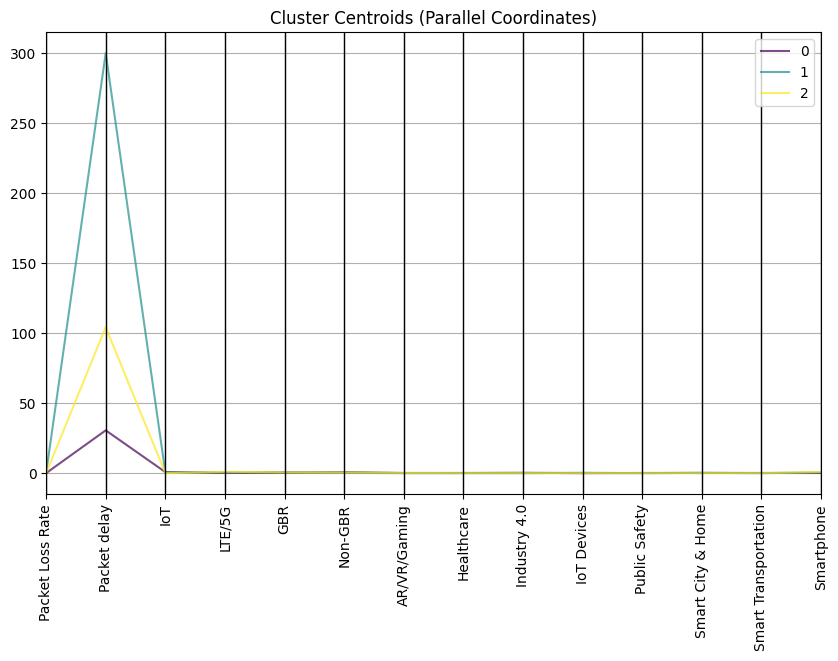

In [42]:
# Parallel Coordinates Plot

df_centroids = pd.DataFrame(centroids, columns=features)
df_centroids['cluster_label'] = range(len(centroids))

plt.figure(figsize=(10, 6))

# Use a color map for different clusters
cmap = plt.cm.get_cmap('viridis', len(df_centroids['cluster_label'].unique()))

# Plot the parallel coordinates
# parallel_coordinates(df_centroids, 'cluster_label', color='red')
parallel_coordinates(df_centroids, 'cluster_label', color=[cmap(cluster) for cluster in df_centroids['cluster_label']], alpha=0.7)
plt.title('Cluster Centroids (Parallel Coordinates)')

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)
plt.show()

# **Performance Evaluation with Labelled Testing Dataset**

In [43]:
test_data = pd.read_csv('/content/drive/MyDrive/Dataset/train_dataset.zip')
test_data.head()

,LTE/5g Category,Time,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,slice Type
0,14,0,0.000001,10,1,0,0,1,0,0,0,0,1,0,0,0,3
1,18,20,0.001000,100,0,1,1,0,1,0,0,0,0,0,0,0,1
2,17,14,0.000001,300,0,1,0,1,0,0,0,0,0,0,0,1,1
3,3,17,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1,1
4,9,4,0.010000,50,1,0,0,1,0,0,0,0,0,1,0,0,2


In [44]:
X_test = test_data[features]
X_test.head()

,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone
0,0.000001,10,1,0,0,1,0,0,0,0,1,0,0,0
1,0.001000,100,0,1,1,0,1,0,0,0,0,0,0,0
2,0.000001,300,0,1,0,1,0,0,0,0,0,0,0,1
3,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1
4,0.010000,50,1,0,0,1,0,0,0,0,0,1,0,0


In [45]:
y_test = test_data['slice Type']

# Assuming labels_true contains the true labels for your test set
labels_true = y_test
labels_true

0        3
1        1
2        1
3        1
4        2
        ..
31578    1
31579    2
31580    2
31581    3
31582    3
Name: slice Type, Length: 31583, dtype: int64

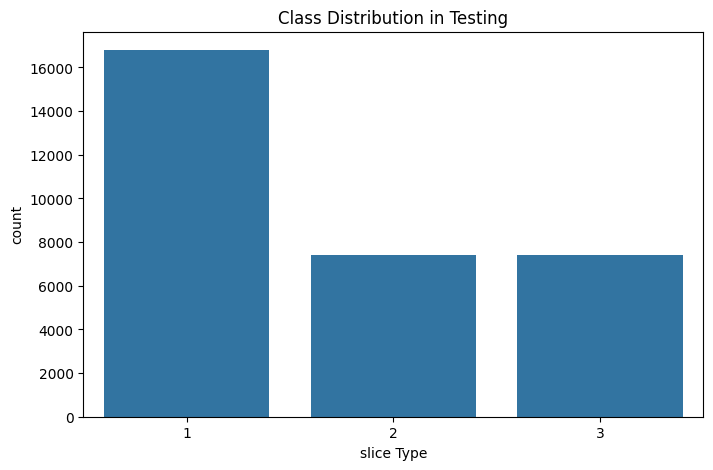

In [46]:
# Class Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=y_test)
plt.title('Class Distribution in Testing')
plt.show()

In [47]:
# Predict cluster labels for the test set
labels_test = kmeans_model.predict(X_test)
labels_test

array([0, 2, 1, ..., 1, 0, 0], dtype=int32)

In [48]:
np.unique(labels_true)

array([1, 2, 3])

In [49]:
np.unique(labels_test)

array([0, 1, 2], dtype=int32)

In [50]:
# Aligning the Predicted Labels as per True Labels to avoid confusion

aligned_labels_test = labels_test + 1
aligned_labels_test

array([1, 3, 2, ..., 2, 1, 1], dtype=int32)

In [51]:
np.unique(aligned_labels_test)

array([1, 2, 3], dtype=int32)

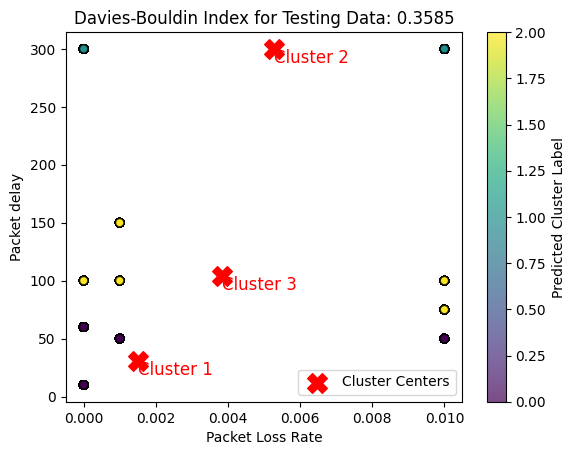

In [52]:
# Calculate Davies-Bouldin Index
db_index_test = metrics.davies_bouldin_score(X_test, labels_test)

# Plot the data and cluster centers
# plt.scatter(X_test[features[0]], X_test[features[1]], c = [plt.cm.viridis(i) for i in labels_test], cmap='viridis', edgecolors='k', alpha=0.7)
scatter = plt.scatter(X_test[features[0]], X_test[features[1]], c = labels_test, cmap='viridis', edgecolors='k', alpha=0.7)

plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Cluster {i+1}', color='red', fontsize=12, ha='left', va='top')

# Add colorbar for better interpretation of Davies-Bouldin Index values
cbar = plt.colorbar(scatter)
cbar.set_label('Predicted Cluster Label')

plt.title(f'Davies-Bouldin Index for Testing Data: {db_index_test:.4f}')
plt.xlabel(X_test.columns[0])
plt.ylabel(X_test.columns[1])
plt.legend()
plt.show()

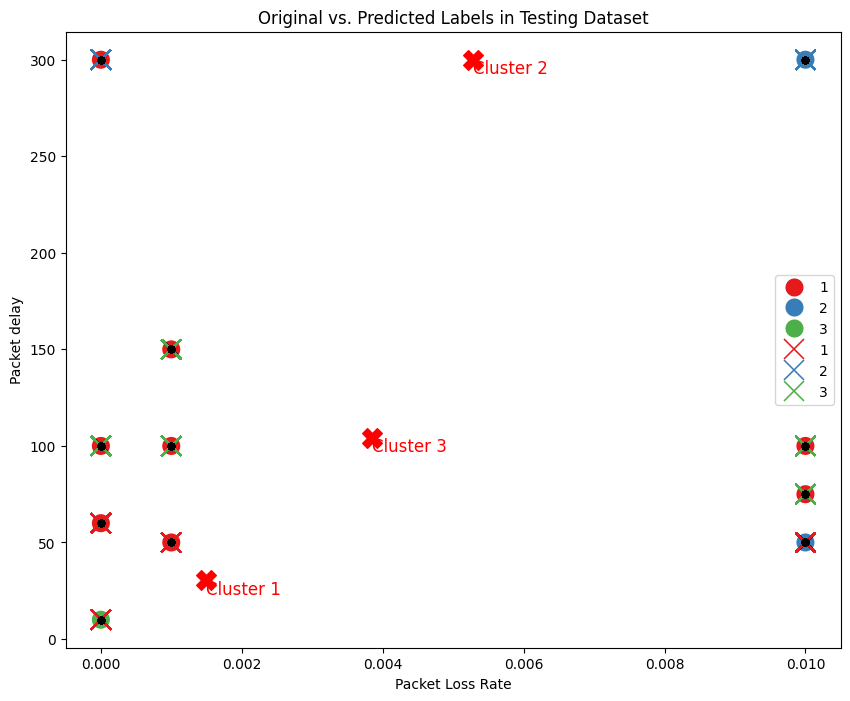

In [53]:
# Original vs. Predicted Labels

plt.figure(figsize=(10, 8))

# sns.scatterplot(x=features[0], y=features[1], hue='slice Type', data=test_data)
sns.scatterplot(x=features[0], y=features[1], hue=labels_true, data=test_data, palette='Set1', s=200)
sns.scatterplot(x=features[0], y=features[1], hue=aligned_labels_test, data=test_data, palette='Set1', s=200, marker='x')

plt.scatter(X_train[features[0]], X_train[features[1]], s=20, c='black')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red')

for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Cluster {i+1}', color='red', fontsize=12, ha='left', va='top')

plt.title('Original vs. Predicted Labels in Testing Dataset')
plt.legend()
plt.show()

In [54]:
silhouette_test_score_value = silhouette_score(X_test, aligned_labels_test)
print("Silhouette Score for Testing Data:", silhouette_test_score_value)

Silhouette Score for Testing Data: 0.7450169628570064


<ipython-input-55-abeeb70ec0e6>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(np.unique(labels_test)))


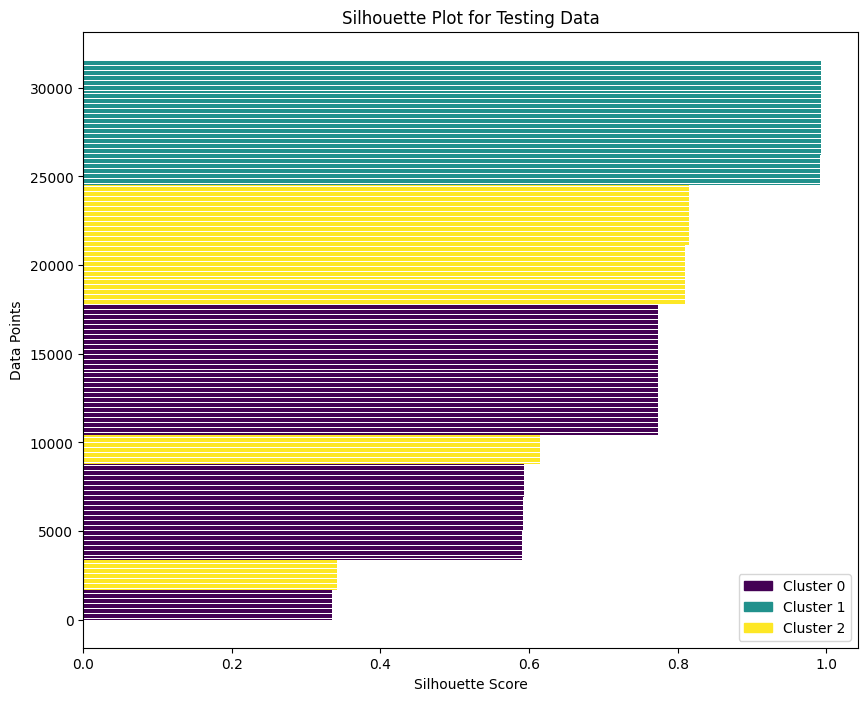

In [55]:
# Silhouette Plots

plt.figure(figsize=(10, 8))

# Create a color map with a unique color for each cluster
colors = plt.cm.get_cmap('viridis', len(np.unique(labels_test)))

silhouette_test_vals = silhouette_samples(X_test, labels_test)
sorted_idx = np.argsort(silhouette_test_vals)

# Plot the silhouette bars
bars = plt.barh(range(len(X_test)), silhouette_test_vals[sorted_idx], color=colors(labels_test[sorted_idx]))

# Create legend based on unique cluster labels
unique_labels = np.unique(labels_test)
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=colors(label)) for label in unique_labels]
plt.legend(legend_handles, [f'Cluster {label}' for label in unique_labels], loc='lower right')

plt.title('Silhouette Plot for Testing Data')
plt.xlabel('Silhouette Score')
plt.ylabel('Data Points')
plt.show()

In [56]:
# Calculate the Adjusted Rand Index - It is the measure of the similarity of datapoints presents in the clusters and it ranges between 0 and 1
ari = adjusted_rand_score(labels_true, aligned_labels_test)

# Print or use the ARI for evaluation
print("Adjusted Rand Index for Testing(Labelled) Data:", ari)

Adjusted Rand Index for Testing(Labelled) Data: 0.27133193017593


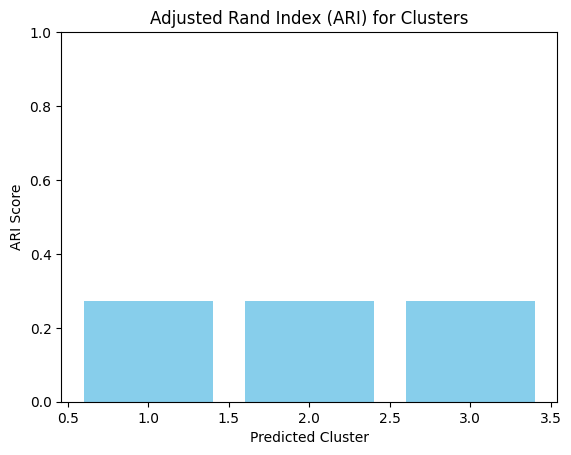

In [57]:
# Visualize ARI
# plt.figure(figsize=(8, 4))
plt.bar((np.unique(aligned_labels_test)), [ari], color=['skyblue'])
plt.ylim(0, 1)  # ARI ranges from 0 to 1
plt.title('Adjusted Rand Index (ARI) for Clusters')
plt.xlabel('Predicted Cluster')
plt.ylabel('ARI Score')
plt.show()

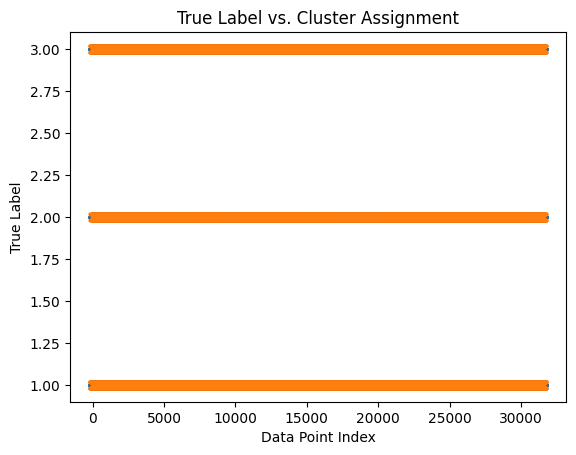

In [58]:
#  Individual Data Point Comparison

# plt.scatter(range(len(labels_true)), labels_true, c=labels_test, cmap='viridis')
plt.scatter(range(len(labels_true)), labels_true, marker='o', label='True Label')
plt.scatter(range(len(labels_test)), aligned_labels_test, marker='x', label='Cluster Assignment')

plt.title('True Label vs. Cluster Assignment')
plt.xlabel('Data Point Index')
plt.ylabel('True Label')
plt.show()

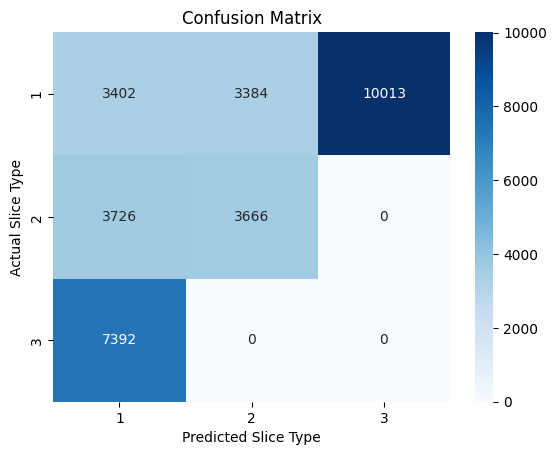

In [59]:
# Confusion Matrix

cm = confusion_matrix(labels_true, aligned_labels_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(labels_true), yticklabels=np.unique(aligned_labels_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Slice Type')
plt.ylabel('Actual Slice Type')
plt.show()

In [61]:
# Calculate accuracy
print("Accuracy", accuracy_score(labels_true, aligned_labels_test))

# Calculate precision
print("Precision", precision_score(labels_true, aligned_labels_test, average='weighted'))

# Calculate recall
print("Recall", recall_score(labels_true, aligned_labels_test, average='weighted'))

# Calculate F1-score
print("F1-score", f1_score(labels_true, aligned_labels_test, average='weighted'))

Accuracy 0.2237912801190514


NameError: name 'precision_score' is not defined

# **SYNC NOTEBOOKS**

In [ ]:
%cp '/content/drive/MyDrive/Colab Notebooks/Exp3 - Slice_Identification_UnSupML.ipynb' '/content/drive/MyDrive/Network_Slicing_with_ML_repo/Network-Slicing-with-ML/Notebooks/'